In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

In [131]:
pd.set_option('display.max_columns', None)  #display all columns

thyroid = pd.read_csv('hypothyroid.csv', na_values='?' ) # infer '?' as Nan

thy =thyroid.copy()
thy.head()

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.30,t,2.5,t,125.0,t,1.14,t,109.0,f,NaN,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.10,t,2.0,t,102.0,f,NaN,f,NaN,f,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.98,f,NaN,t,109.0,t,0.91,t,120.0,f,NaN,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.16,t,1.9,t,175.0,f,NaN,f,NaN,f,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.72,t,1.2,t,61.0,t,0.87,t,70.0,f,NaN,SVI,P


In [132]:
thy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        3771 non-null   float64
 1   sex                        3622 non-null   object 
 2   on thyroxine               3772 non-null   object 
 3   query on thyroxine         3772 non-null   object 
 4   on antithyroid medication  3772 non-null   object 
 5   sick                       3772 non-null   object 
 6   pregnant                   3772 non-null   object 
 7   thyroid surgery            3772 non-null   object 
 8   I131 treatment             3772 non-null   object 
 9   query hypothyroid          3772 non-null   object 
 10  query hyperthyroid         3772 non-null   object 
 11  lithium                    3772 non-null   object 
 12  goitre                     3772 non-null   object 
 13  tumor                      3772 non-null   objec

## EDA

### Boxplot

<Axes: >

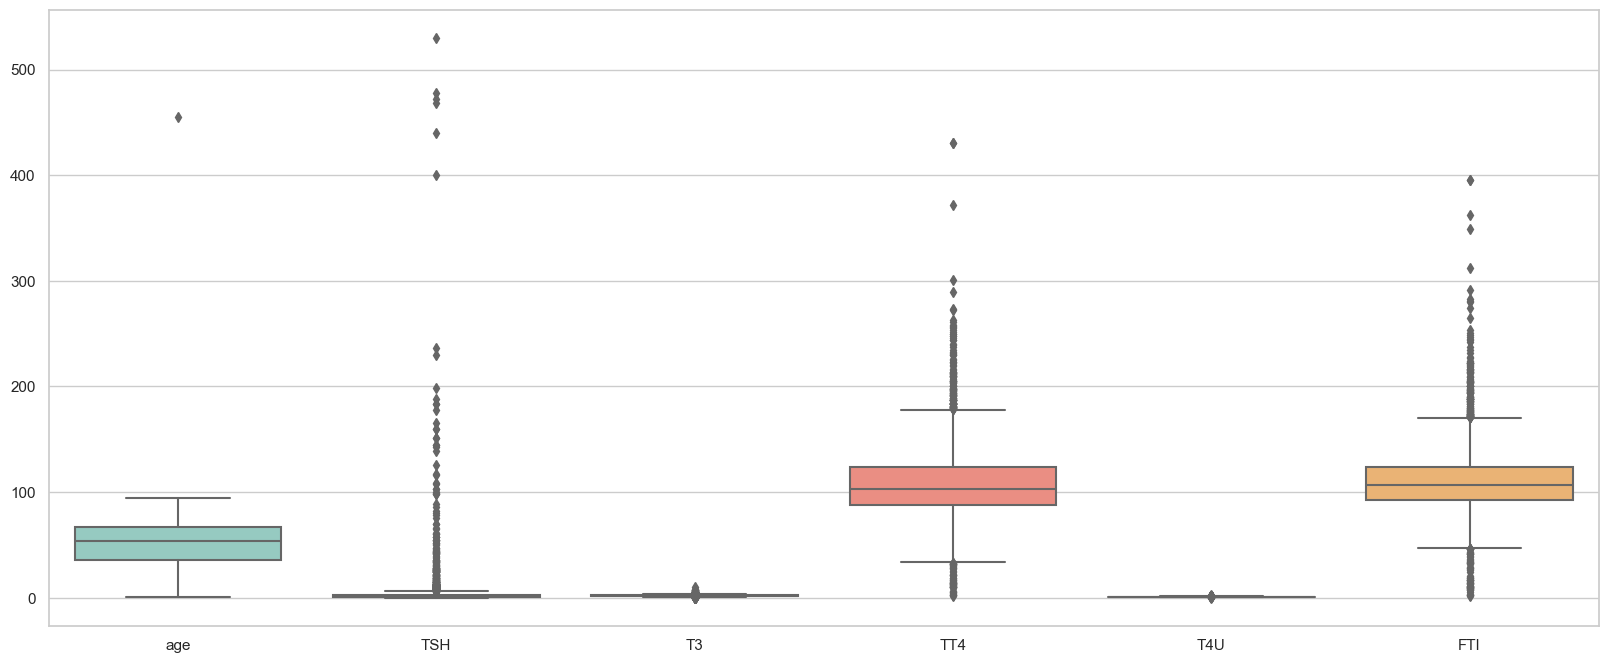

In [133]:
#Boxplot

#list of continuous column names
continuous_cols = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI']
plt.figure(figsize=(20,8))
# Set a different style for the plot
sns.set(style='whitegrid')
sns.boxplot(data=thy[continuous_cols], palette='Set3')

### Outlier can be observed in Age column, replacing it to Nan

In [134]:
print(thy.age.max()) #before
thy['age']=thy['age'].replace(thy.age.max(),np.nan)
thy.age.max() #after

455.0


94.0

### Handling columns with missing 'sex' category but pregnancy =True

In [135]:
pregnancy_mask = thy[(thy['pregnant'] == 't') & (thy['sex'].isna())]
pregnancy_mask

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
1609,73.0,NaN,f,f,f,f,t,f,f,f,f,f,f,f,f,f,t,2.2,t,2.5,t,110.0,t,1.28,t,85.0,f,NaN,other,P
3271,21.0,NaN,f,f,f,f,t,f,f,f,f,f,f,t,f,f,t,2.4,t,3.5,t,171.0,t,1.49,t,115.0,f,NaN,STMW,P


In [137]:
print(thy.sex.isna().sum())
thy.loc[pregnancy_mask.index, 'sex'] = 'F'
print(thy.sex.isna().sum())

148
148


### Violin Plot

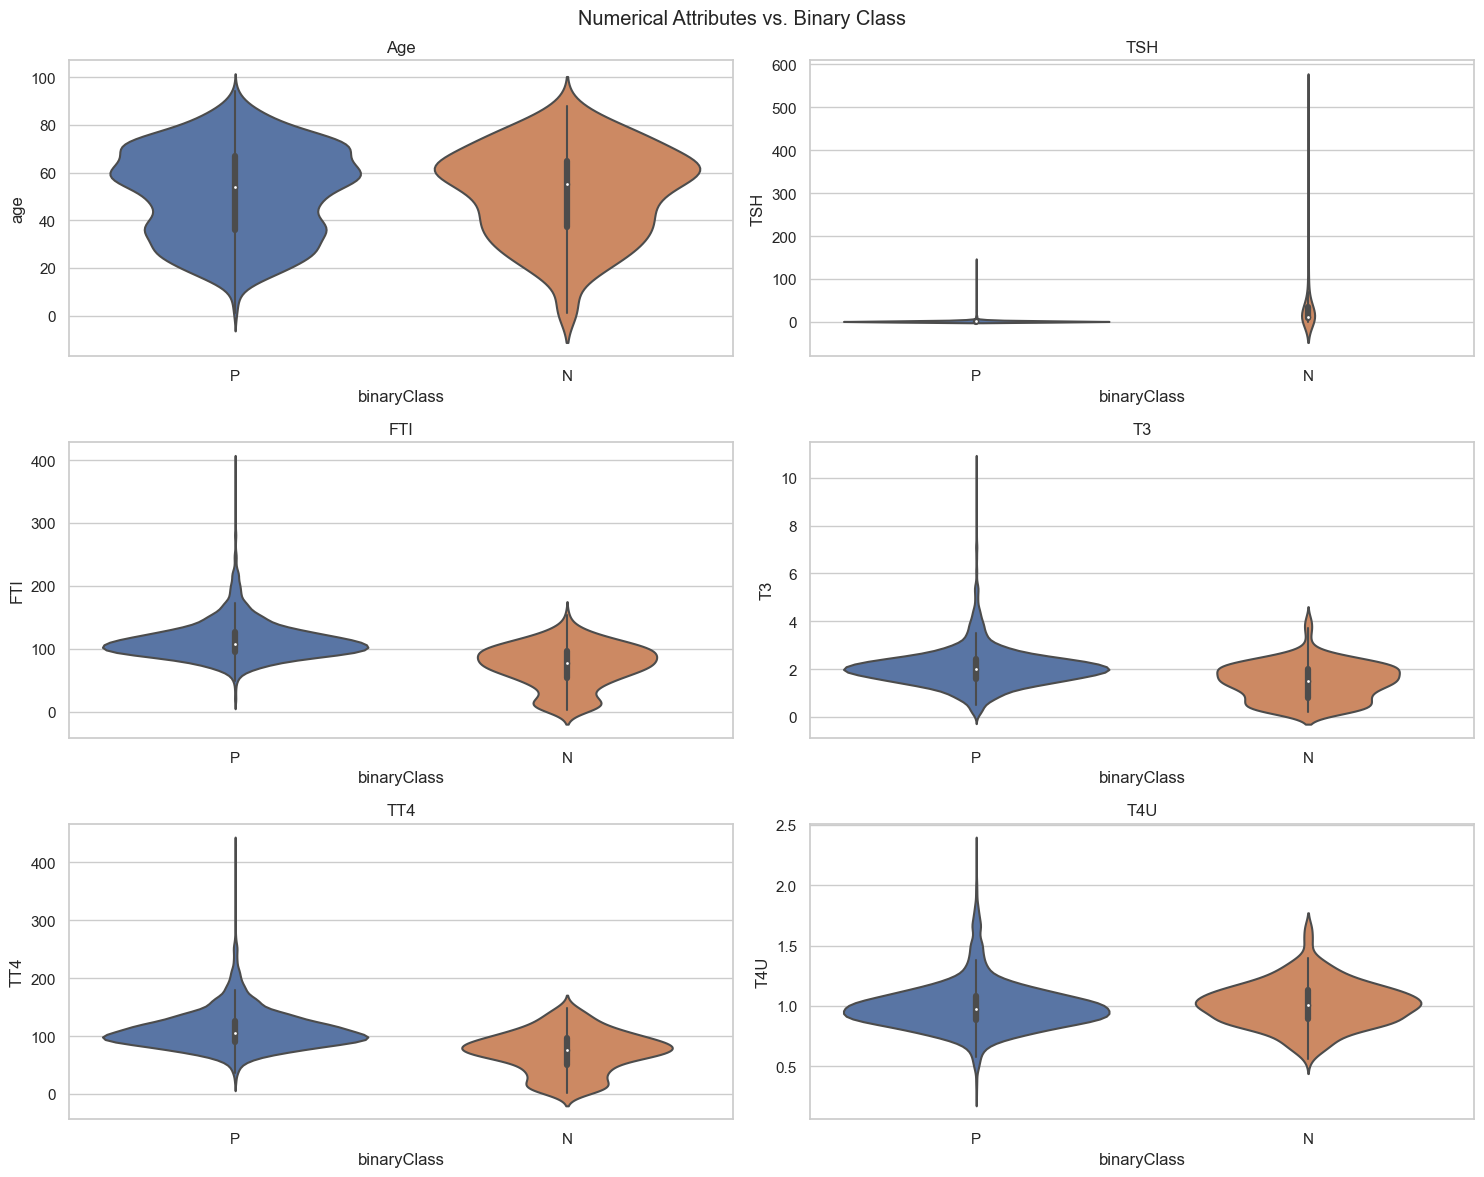

In [138]:
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Numerical Attributes vs. Binary Class')
sns.set_style('whitegrid')

# age vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age')

# TSH vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['TSH'], ax=axes[0, 1])
axes[0, 1].set_title('TSH')

# FTI vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['FTI'], ax=axes[1, 0])
axes[1, 0].set_title('FTI')

# T3 vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['T3'], ax=axes[1, 1])
axes[1, 1].set_title('T3')

# TT4 vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['TT4'], ax=axes[2, 0])
axes[2, 0].set_title('TT4')

# T4U vs. 'binaryClass'
sns.violinplot(x=thy['binaryClass'], y=thy['T4U'], ax=axes[2, 1])
axes[2, 1].set_title('T4U')

plt.tight_layout()
plt.show()


### Pairplot (Continous columns , hue=predicted class )

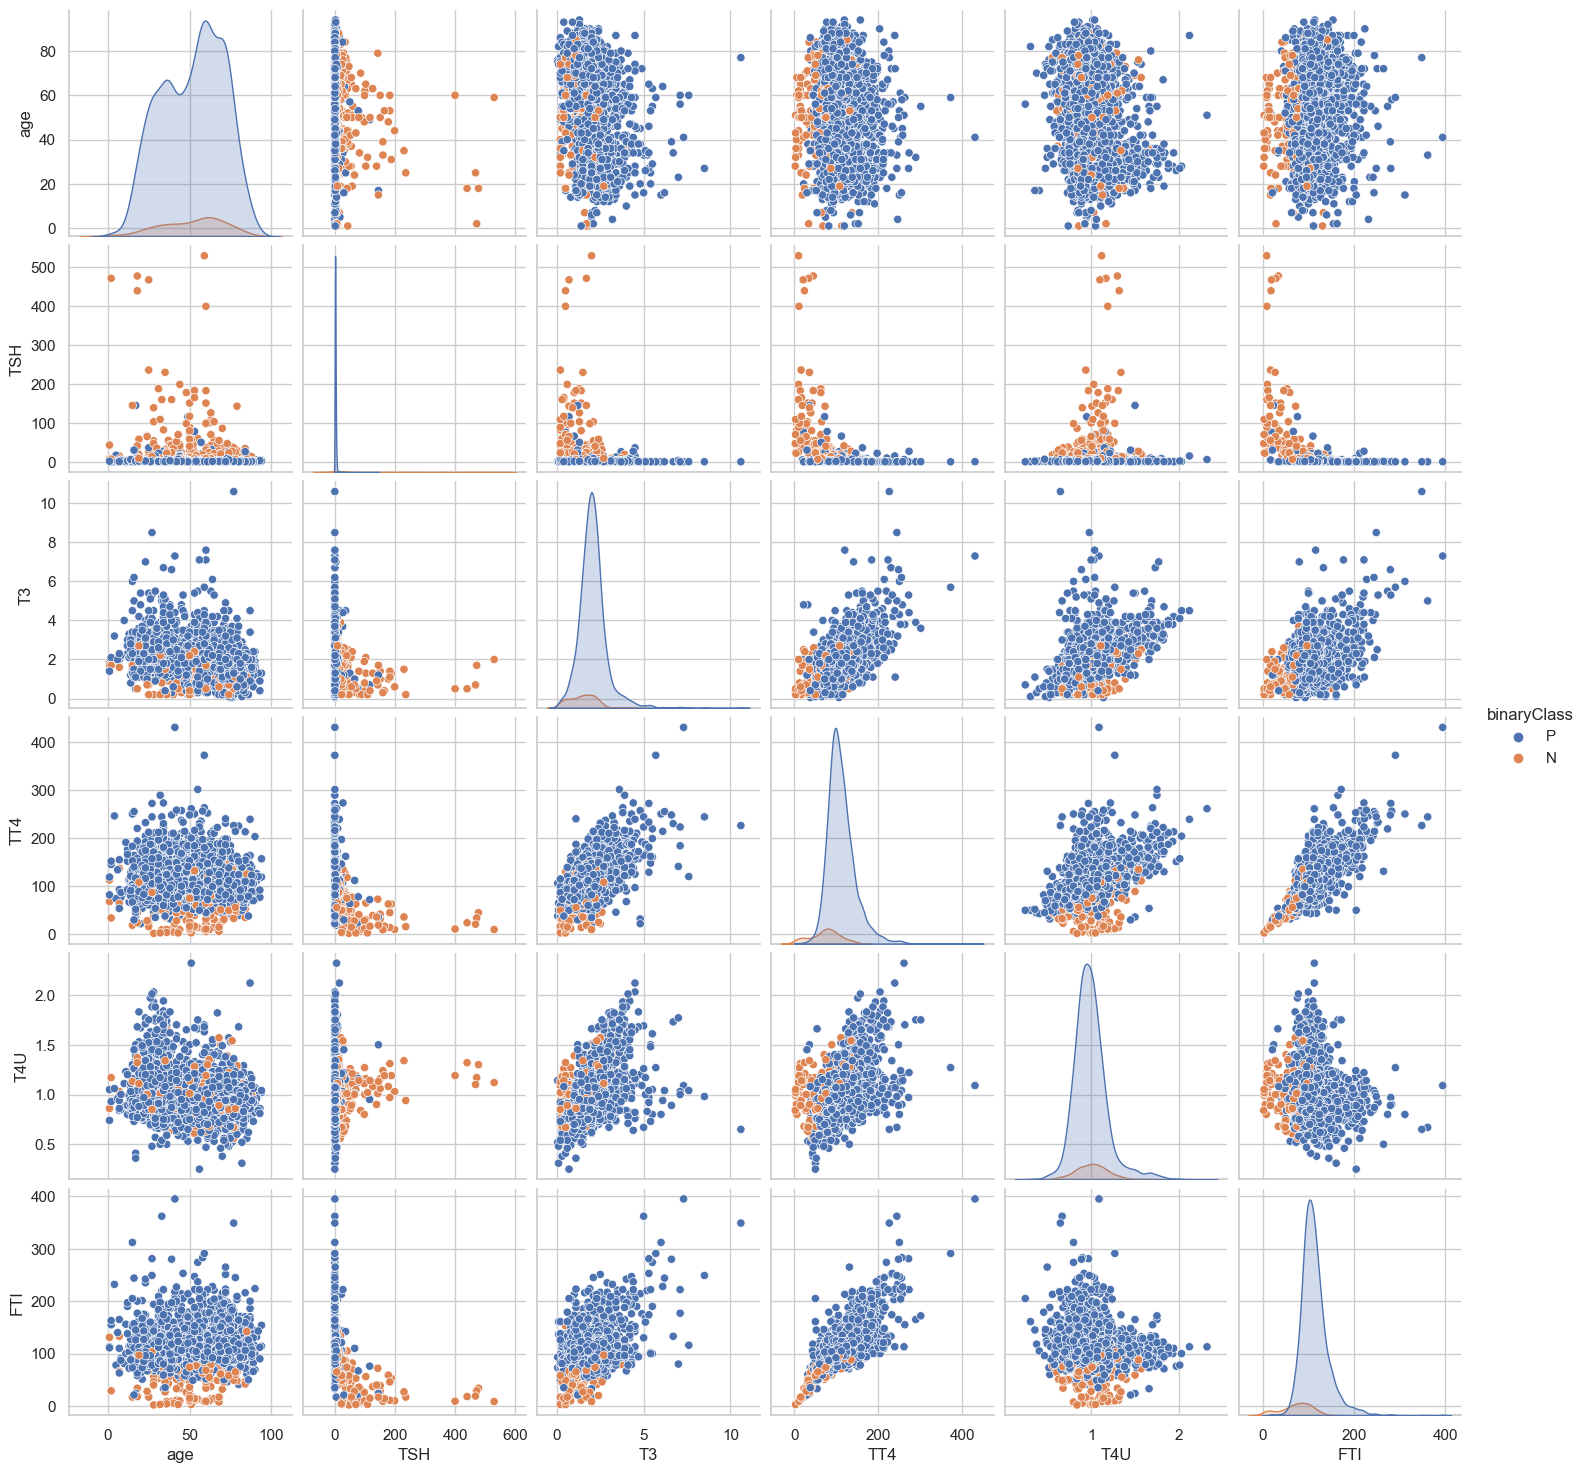

In [139]:
pairplot_subset = ['age','TSH', 'T3', 'TT4', 'T4U', 'FTI','sex','binaryClass']
sns.pairplot(thy[pairplot_subset], hue="binaryClass",diag_kind='kde' )

C:\Users\Bisrat\AppData\Local\Temp\ipykernel_80236\3842769548.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = thy.corr()


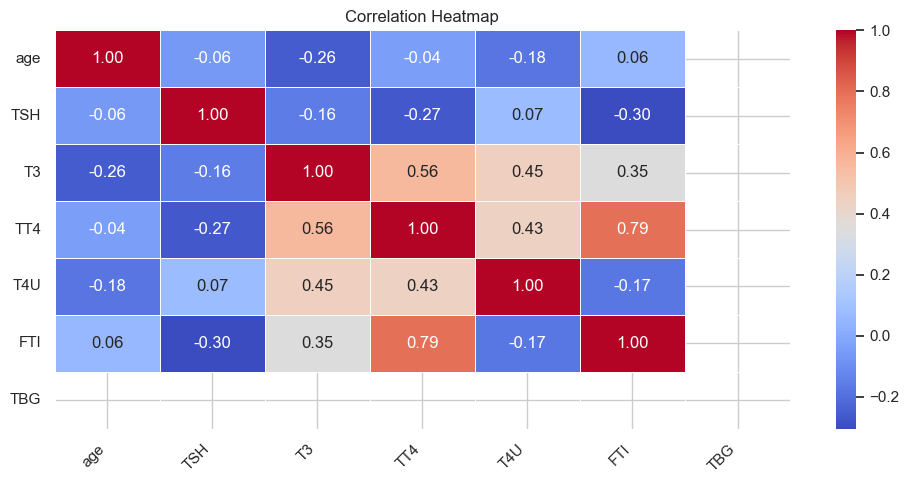

In [10]:
# Compute the correlation matrix
correlation_matrix = thy.corr()

# Create a figure and axes for the heatmap
fig, ax = plt.subplots(figsize=(10, 5))

# Customize the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, ax=ax)

# Set the title and labels
ax.set_title("Correlation Heatmap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

# Show the heatmap
plt.tight_layout()
plt.show()

- TT4 has strong corr with FTI(0.79) and T4U(0.43)

## Checking Missing Data

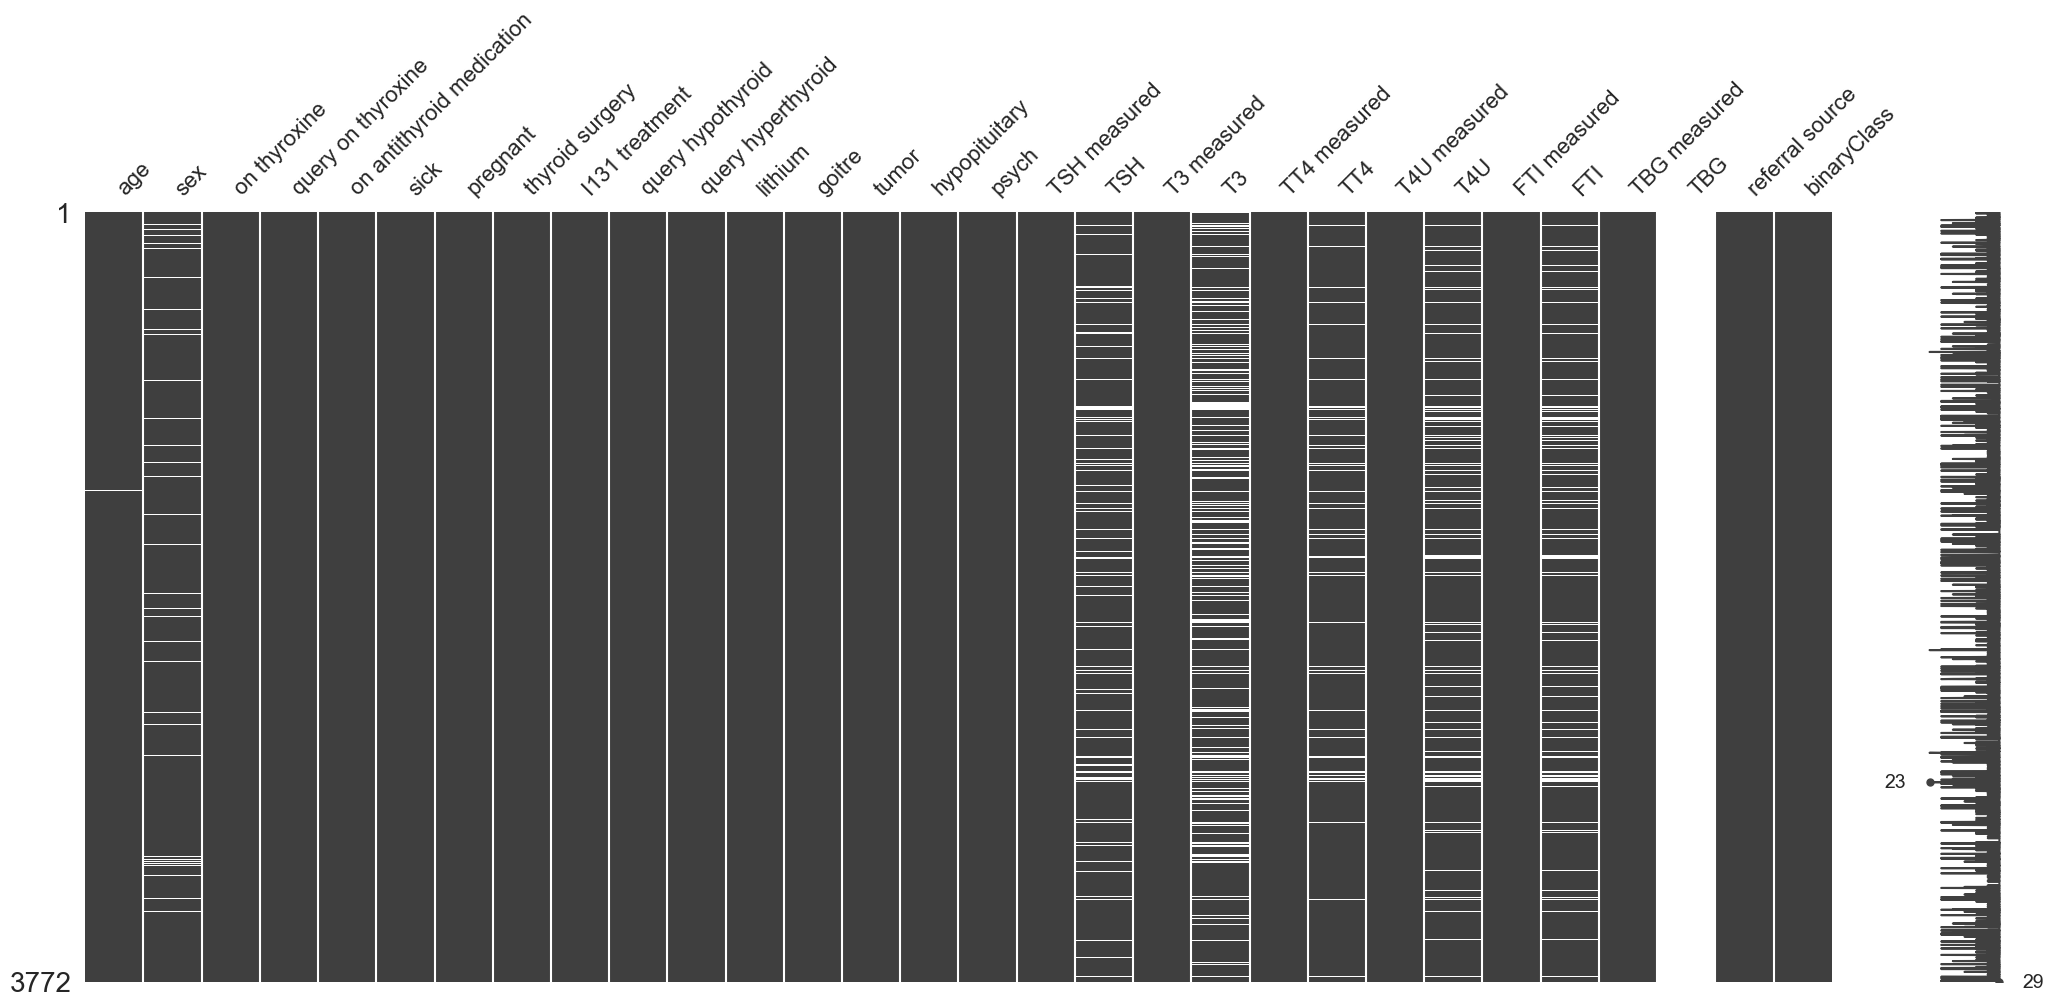

In [11]:
# visual representation of missing
#!pip install missingno
import missingno as msno

msno.matrix(thy)
plt.show()

In [12]:
thy.isna().sum(axis=0).sort_values(ascending=False)

TBG                          3772
T3                            769
T4U                           387
FTI                           385
TSH                           369
TT4                           231
sex                           148
age                             2
referral source                 0
TBG measured                    0
FTI measured                    0
T4U measured                    0
TT4 measured                    0
T3 measured                     0
TSH measured                    0
psych                           0
hypopituitary                   0
tumor                           0
goitre                          0
lithium                         0
query hyperthyroid              0
query hypothyroid               0
I131 treatment                  0
thyroid surgery                 0
pregnant                        0
sick                            0
on antithyroid medication       0
query on thyroxine              0
on thyroxine                    0
binaryClass   

#### Checking if missing values in hormone test measurement columns correspond to 'f' in the 'measured' column

In [13]:
#checking if missing values corrosponds to 'f' in measured column

col_missing_test_value = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']
for col in col_missing_test_value:
    print(col, thy[col].isna().sum(), thy[col][thy[col+' measured']=='f'].isna().sum())


TSH 369 369
T3 769 769
TT4 231 231
T4U 387 387
FTI 385 385


- all good here, we can drop the boolen columns referring to  harmone measured or not
- The missing values in the columns ['TSH', 'T3', 'TT4', 'T4U', 'FTI'] are all associated with unmeasured values, as indicated by the same count of missing values in the corresponding 'measured' boolean columns. Therefore, we can safely drop the 'measured' boolean columns. para phrase for clear explanation

In [14]:
# Verify the updated DataFrame
#thy_clean.head()

### Drop the rows with 5 or more missing values

In [15]:
#### this provides us with the rows which are missing 3 or more 

col_missing_test_value = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']   # TBG already dropped; sex =150; age=1 

# Create a mask to identify rows with 3 or more missing values
missing_rows_mask = thy[col_missing_test_value].isna().sum(axis=1) == 5

# Filter the DataFrame to select rows with 3 or more missing values
missing_rows = thy[missing_rows_mask]

# Print the DataFrame showing rows with 3 or more missing values
missing_rows.head(3)

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH measured,TSH,T3 measured,T3,TT4 measured,TT4,T4U measured,T4U,FTI measured,FTI,TBG measured,TBG,referral source,binaryClass
39,64.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,P
66,69.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,P
72,59.0,F,f,f,f,t,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,P


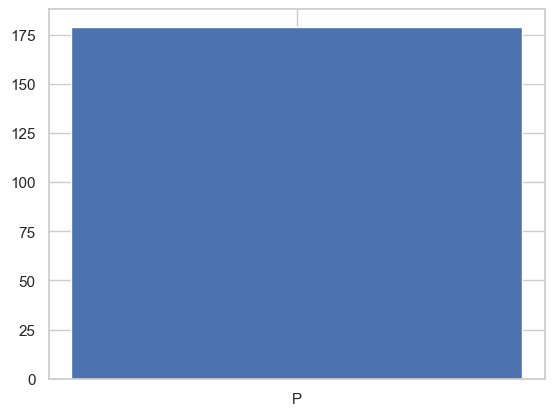

P    179
Name: binaryClass, dtype: int64

In [16]:
value_counts = missing_rows['binaryClass'].value_counts()

# Plot the bar plot
plt.bar(value_counts.index, value_counts.values)
plt.show()
value_counts

- TBG is an empty column with no info, hence TBG and TBG measured will be dropped.
- The missing values in the columns ['TSH', 'T3', 'TT4', 'T4U', 'FTI'] are all associated with unmeasured values, as indicated by the same count of missing values in the corresponding 'measured' boolean columns. Therefore, we can safely drop the 'measured' boolean columns. para phrase for clear explanation.
- We will also drop any rows from the thy_enc that have 5 or more missing values for the hormone tests, namely 'TSH', 'T3', 'TT4', 'T4U', and 'FTI'. 
- This will drop 179 instances belonging to the positive class and 04 instances belonging to the negative class.

In [140]:
thy_clean= thy.copy()


# Drop 'TBG' and the boolean columns referring to hormone measurement and assign to thy_clean
thy_clean = thy.drop(columns=['TBG','TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured','query on thyroxine'])

# Drop the rows with 3 or more missing values
thy_clean.drop(thy[missing_rows_mask].index, inplace=True)

#checking shape of 2 df
print(thy.shape)
print(thy_clean.shape)

(3772, 30)
(3593, 22)


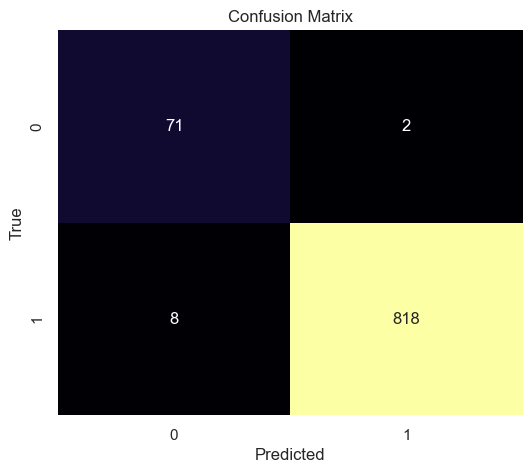

- False positive i.e. Predicted thyroid but its not actually: 0
- False Negative i.e. Predicted NO Thyroid but it was actually:5

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93        73
           1       1.00      0.99      0.99       826

    accuracy                           0.99       899
   macro avg       0.95      0.98      0.96       899
weighted avg       0.99      0.99      0.99       899



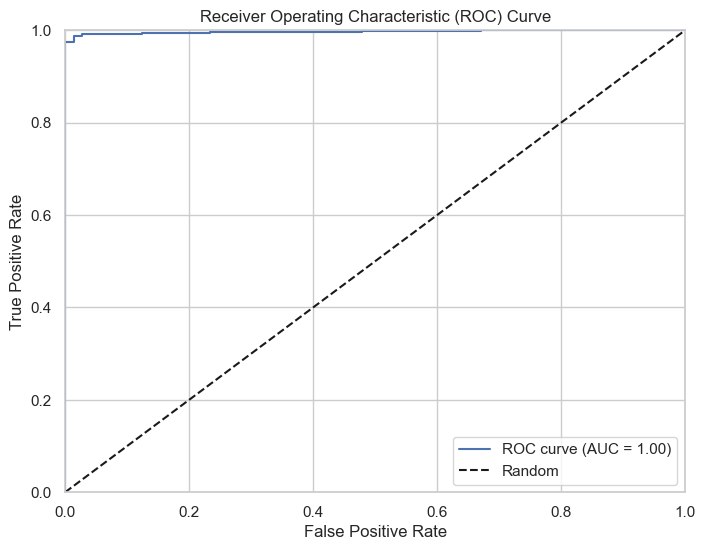

AUC Score: 0.9968489833825335


In [ ]:
# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_x, annot=True, cmap='inferno', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print('- False positive i.e. Predicted thyroid but its not actually: 0')
print('- False Negative i.e. Predicted NO Thyroid but it was actually:5\n')

# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class
y_pred_proba = best_pipeline.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Interpretation
print('AUC Score:', auc_score)

In [18]:
thy_clean

,age,sex,on thyroxine,query on thyroxine,on antithyroid medication,sick,pregnant,thyroid surgery,I131 treatment,query hypothyroid,query hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,referral source,binaryClass
0,41.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.30,2.5,125.0,1.14,109.0,SVHC,P
1,23.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,4.10,2.0,102.0,NaN,NaN,other,P
2,46.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.98,NaN,109.0,0.91,120.0,other,P
3,70.0,F,t,f,f,f,f,f,f,f,f,f,f,f,f,f,0.16,1.9,175.0,NaN,NaN,other,P
4,70.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.72,1.2,61.0,0.87,70.0,SVI,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,19.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,8.80,2.7,108.0,1.11,97.0,other,N
3768,68.0,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,1.00,2.1,124.0,1.08,114.0,SVI,P
3769,74.0,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,5.10,1.8,112.0,1.07,105.0,other,P
3770,72.0,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,0.70,2.0,82.0,0.94,87.0,SVI,P


In [19]:
thy_clean.sex.nunique()

2

### test_train_split

# CODE STARTS HERE

In [141]:
X = thy_clean.drop(['binaryClass'], axis=1)
y = thy_clean['binaryClass']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=13)

In [143]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
le = LabelEncoder()

# Transform the labels in the training and test set
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [144]:
#creating a pipeline

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


numeric_transformer = Pipeline(steps=[
       ('imputer', KNNImputer(n_neighbors=1))
      ,('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='most_frequent'))
      ,('encoder', OneHotEncoder( handle_unknown = 'ignore', sparse= False))
])




In [145]:
# column selector

from sklearn.compose import make_column_selector as selector

categorical_columns_selector = selector(dtype_include=object)
numerical_columns_selector = selector(dtype_exclude=object)

In [303]:
num_col = numerical_columns_selector(thy_clean)
Cat_col = categorical_columns_selector(thy_clean.drop(columns=['binaryClass']))


In [305]:
# creating our column transformer

from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_col),
    ('cat', categorical_transformer, Cat_col),
])

In [149]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTEN
from sklearn.model_selection import RandomizedSearchCV, RepeatedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy.stats import randint




In [306]:
# Create a pipeline
RFC = RandomForestClassifier(n_estimators=10, n_jobs=2, random_state=13)

from imblearn.pipeline import Pipeline as ImbPipeline

pipeline1 = ImbPipeline(steps = [
               ('preprocessor', preprocessor),
               ('oversamp',SMOTEN(random_state=13))
              ,('classifier',RFC)
           ])


In [153]:
pipeline1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'referral source'])])),
                ('oversamp', SMOTEN(random_state=11)),
                ('classifier',
                 RandomForestClassifier(n_estimators=10, n_jobs=2,
                                        random_state=13))])

In [155]:
#cross validation specification

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=13)

In [163]:
#validation curve to find best max_depth

from sklearn.model_selection import validation_curve

max_depth = np.arange(1, 10, 2)

train_scores, test_scores = validation_curve(
                                pipeline1, X_train, y_train,param_name="classifier__max_depth", param_range=max_depth,
                                cv=cv, n_jobs=1,scoring='recall')

c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

In [164]:
#converting to errors

train_errors, test_errors =1- train_scores,1 - test_scores


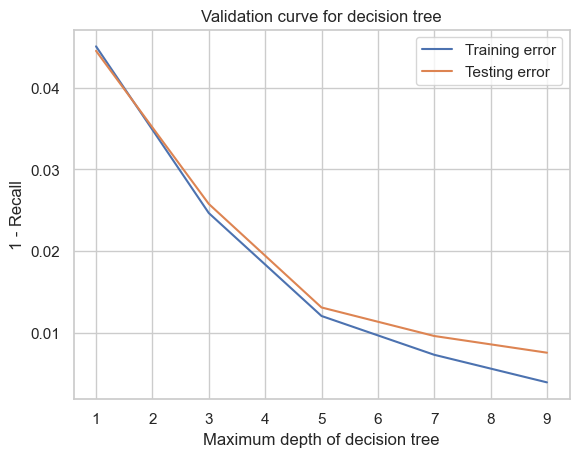

In [166]:
#plotting errors vs max_depth

plt.plot(max_depth, train_errors.mean(axis=1), label="Training error")
plt.plot(max_depth, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("Maximum depth of decision tree")
plt.ylabel("1 - Recall")
_ = plt.title("Validation curve for decision tree")

In [362]:
pipeline1.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    KNNImputer(n_neighbors=1)),
                                                   ('scaler', StandardScaler())]),
                                   ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='most_frequent')),
                                                   ('encoder',
                                                    OneHotEncoder(handle_unknown='ignore',
                                                                  sparse=False))]),
                                   ['sex', 'on thyroxine',
                                    'on antithyroid medication', 'sick',
                                    'pregnant', 'thyroid surgery',

In [367]:
feature_name = pipeline1.named_steps['preprocessor'].get_feature_names_out()

Permutation explainer: 900it [00:41, 16.45it/s]                         
No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


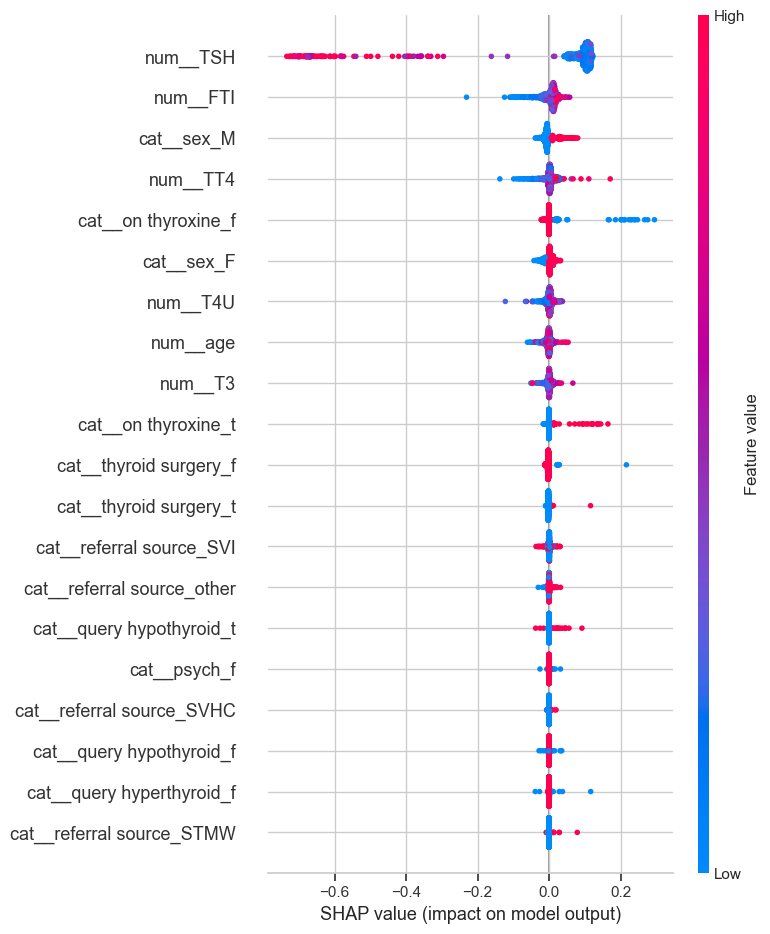

In [368]:


# create the explainer
explainer = shap.Explainer(pipeline1.named_steps['classifier'].predict_proba, pipeline1.named_steps['preprocessor'].transform(X_train), feature_names=feature_name)
# calculate the SHAP values
X_test_transformed = pipeline1.named_steps['preprocessor'].transform(X_test)
shap_values = explainer(X_test_transformed)

# plot the SHAP values
shap.summary_plot(shap_values[:, :, 1], X_test_transformed)

In [169]:

# define the hyperparameters to search over
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': randint(5, 20),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 4),
    'classifier__max_features': ['sqrt', 'log2']
}

# define the inner and outer cross-validation folds
inner_cv = RepeatedKFold(n_splits=3, n_repeats=3, random_state=13)
outer_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=13)

# perform nested cross-validation with hyperparameter optimization
random_searchFC = RandomizedSearchCV(pipeline1, param_distributions=param_dist, cv=inner_cv, n_iter=10, n_jobs=-1)
scores = cross_val_score(random_searchFC, X=X_train, y=y_train, cv=outer_cv, scoring='recall')

print('Nested CV score: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))



c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Nested CV score: 0.994 +/- 0.004


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Best n_estimators: 170
Best max_depth: 17
Best min_samples_split: 7
Best min_samples_leaf: 1
Best max_features: log2
Best score: 0.9899784584330521


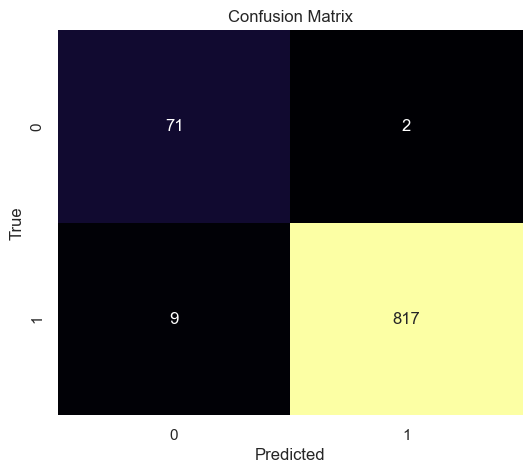

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        73
           1       1.00      0.99      0.99       826

    accuracy                           0.99       899
   macro avg       0.94      0.98      0.96       899
weighted avg       0.99      0.99      0.99       899



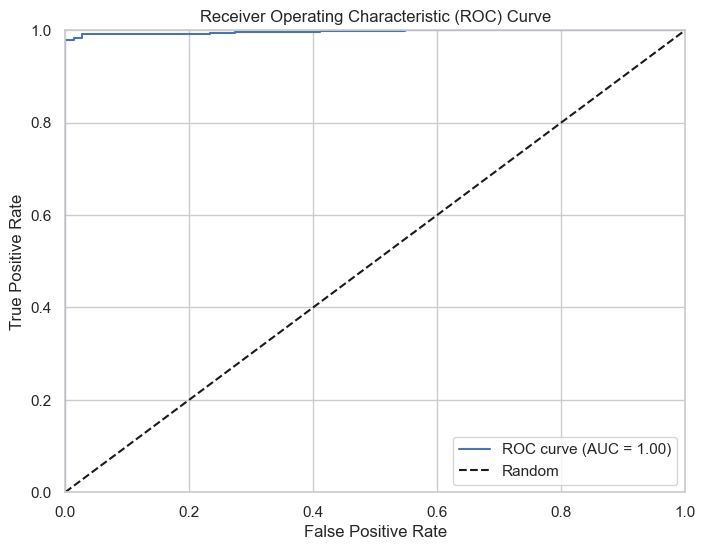

In [255]:

# Fit the random search model
random_searchFC.fit(X_train, y_train)

# View the best parameters from the random search
print('Best n_estimators:', random_searchFC.best_estimator_.get_params()['classifier__n_estimators'])

print('Best max_depth:', random_searchFC.best_estimator_.get_params()['classifier__max_depth'])

print('Best min_samples_split:', random_searchFC.best_estimator_.get_params()['classifier__min_samples_split'])

print('Best min_samples_leaf:', random_searchFC.best_estimator_.get_params()['classifier__min_samples_leaf'])

print('Best max_features:', random_searchFC.best_estimator_.get_params()['classifier__max_features'])

# View the best score

print('Best score:', random_searchFC.best_score_)

# View the best estimator

random_searchFC.best_estimator_

# Get the predictions

y_pred = random_searchFC.predict(X_test)

# Get the confusion matrix

confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 5))

sns.heatmap(confusion, annot=True, cmap='inferno', fmt='d', cbar=False)

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()

# Print classification report

report = classification_report(y_test, y_pred)

print("Classification Report:")

print(report)

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class

y_pred_proba = random_searchFC.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()

In [239]:
random_searchFC.best_estimator_.predict(X_test.iloc[:1])

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'referral source'])])),
                ('oversamp', SMOTEN(random_state=11)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, min_samples_split=6,
                                        n_estimators=199, n_jobs=2,
                                        random_state=13))])

In [243]:
best_estimator = random_searchFC.best_estimator_
best_estimator.fit(X_train, y_train)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'referral source'])])),
                ('oversamp', SMOTEN(random_state=11)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, min_samples_split=6,
                                        n_estimators=199, n_jobs=2,
                                        random_state=13))])

# SVM MODEL 2 CODE STARTS HERE

In [184]:
# now we try SVM

from sklearn.svm import SVC

svc = SVC(kernel='linear', C=1.0, random_state=0, probability=True)

from imblearn.pipeline import Pipeline as ImbPipeline

pipeline2 = ImbPipeline(steps = [
                ('preprocessor', preprocessor),
                ('oversamp',SMOTEN(random_state=11))
                ,('svc',svc)
            ])

In [248]:
#create pipeline
pipeline2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'referral source'])])),
                ('oversamp', SMOTEN(random_state=11)),
                ('svc',
                 SVC(kernel='linear', probability=True, random_state=0))])

In [ ]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=13)

In [199]:
from sklearn.model_selection import validation_curve

param_range = np.logspace(-2, 2, 6) 

train_scores, test_scores = validation_curve(
                                pipeline2, X_train, y_train,param_name="svc__C", param_range=param_range,
                                cv=cv, n_jobs=-1)

In [200]:
train_errors, test_errors =1- train_scores,1 - test_scores


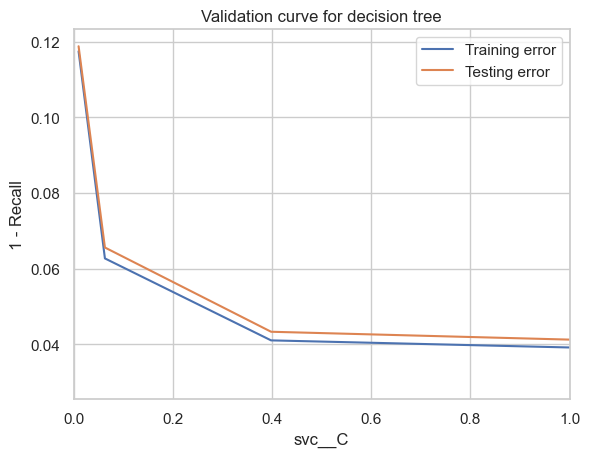

In [215]:
plt.plot(param_range, train_errors.mean(axis=1), label="Training error")
plt.plot(param_range, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("svc__C")
plt.ylabel("1 - Recall")
#reduce Xrange
plt.xlim([0.0, 1.0])
_ = plt.title("Validation curve for decision tree")

In [320]:
explainer = shap.TreeExplainer(pipeline1['classifier'])

In [322]:
data_transformation = pipeline1['preprocessor'].transform(X_train)

In [334]:
#get the feature names out
feature_names = pipeline1['preprocessor'].transformers_[1][1]['encoder'].get_feature_names_out(Cat_col)

In [335]:
feature_names

array(['sex_F', 'sex_M', 'on thyroxine_f', 'on thyroxine_t',
       'on antithyroid medication_f', 'on antithyroid medication_t',
       'sick_f', 'sick_t', 'pregnant_f', 'pregnant_t',
       'thyroid surgery_f', 'thyroid surgery_t', 'I131 treatment_f',
       'I131 treatment_t', 'query hypothyroid_f', 'query hypothyroid_t',
       'query hyperthyroid_f', 'query hyperthyroid_t', 'lithium_f',
       'lithium_t', 'goitre_f', 'goitre_t', 'tumor_f', 'tumor_t',
       'hypopituitary_f', 'hypopituitary_t', 'psych_f', 'psych_t',
       'referral source_STMW', 'referral source_SVHC',
       'referral source_SVHD', 'referral source_SVI',
       'referral source_other'], dtype=object)

In [349]:
explainer = shap.TreeExplainer(pipeline1['classifier'],feature_names=feature_names)

In [337]:
shap_values = explainer(data_transformation)

In [341]:
len(data_transformation[0])

39

In [ ]:
#summray plot
#shap.summary_plot(shap_values, data_transformation, plot_type="bar")

#another type of plot beasware of the size of the data



shap.plots.waterfall(shap_values[0][0])






In [210]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV
from sklearn.metrics import make_scorer, recall_score, confusion_matrix

In [216]:
# Define the parameter search space
param_space = {'svc__C': [0.1, 1, 10, 100, 1000],
                'svc__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                'svc__kernel': ['rbf', 'poly', 'sigmoid']}



# define the inner and outer cross-validation folds
inner_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=13)
outer_cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=13)

# perform nested cross-validation with hyperparameter optimization
bayes_search = BayesSearchCV(pipeline2, param_space, n_iter=20, cv=5, random_state=13, n_jobs=-1)
scores = cross_val_score(pipeline2, X=X_train, y=y_train, cv=outer_cv, scoring='recall')

print('Nested CV score: {:.3f} +/- {:.3f}'.format(np.mean(scores), np.std(scores)))

# Fit the bayes_search model
bayes_search.fit(X_train, y_train)

# Print the best parameters and best specificity score
print("Best Parameters: ", bayes_search.best_params_)
print("Best recall Score: ", bayes_search.best_score_)


c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed 

Nested CV score: 0.970 +/- 0.008


c:\Users\Bisrat\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Parameters:  OrderedDict([('svc__C', 1000.0), ('svc__gamma', 0.01), ('svc__kernel', 'rbf')])
Best Specificity Score:  0.9699333062052127


Best svc__C: 1000.0
Best svc__gamma: 0.01
Best svc__kernel: rbf
Best score: 0.9699333062052127


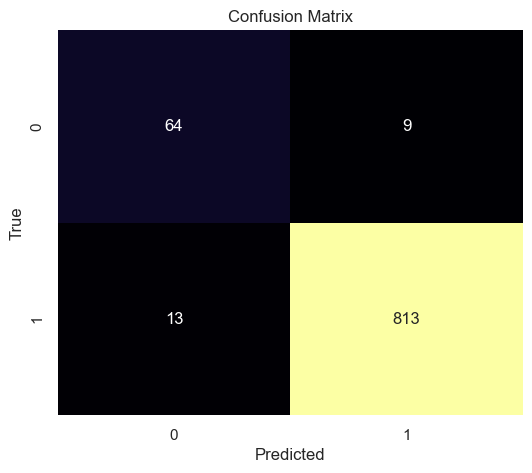

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        73
           1       0.99      0.98      0.99       826

    accuracy                           0.98       899
   macro avg       0.91      0.93      0.92       899
weighted avg       0.98      0.98      0.98       899



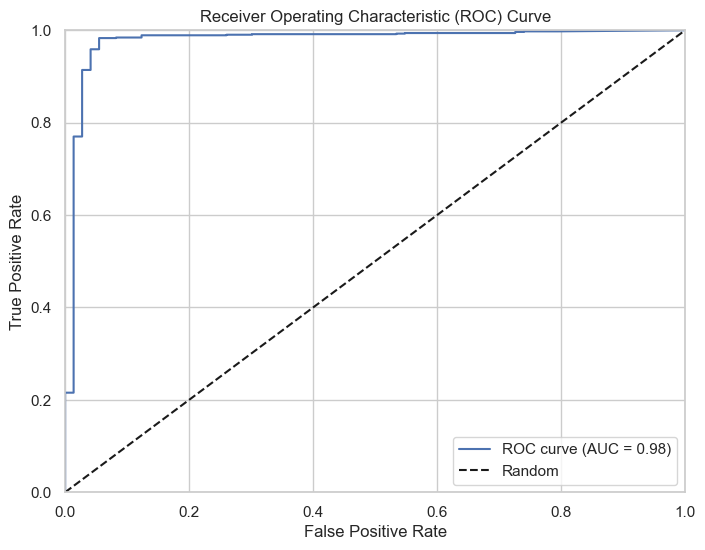

In [254]:

# View the best parameters from the random search
print('Best svc__C:', bayes_search.best_estimator_.get_params()['svc__C'])

print('Best svc__gamma:', bayes_search.best_estimator_.get_params()['svc__gamma'])

print('Best svc__kernel:', bayes_search.best_estimator_.get_params()['svc__kernel'])



# View the best score

print('Best score:', bayes_search.best_score_)

# View the best estimator

bayes_search.best_estimator_

# Get the predictions

y_pred = bayes_search.predict(X_test)

# Get the confusion matrix

confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 5))

sns.heatmap(confusion, annot=True, cmap='inferno', fmt='d', cbar=False)

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()



# Print classification report

report = classification_report(y_test, y_pred)

print("Classification Report:")

print(report)

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class

y_pred_proba = bayes_search.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()

# NOW ENSEMBLE both models

In [225]:
from sklearn.ensemble import VotingClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [226]:
random_searchFC.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'TSH', 'T3', 'TT4',
                                                   'T4U', 'FTI']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['sex', 'on thyroxine',
                                                   'on antithyroid medication',
                                                   'sick', 'pregnant',
                                                   'thyroid surgery',
                                                   'I131 treatment',
                                                   'query hypothyroid',
                                                   'query hyperthyroid',
                                                   'lithium', 'goitre', 'tumor',
                                                   'hypopituitary', 'psych',
                                                   'referral source'])])),
                ('oversamp', SMOTEN(random_state=11)),
                ('classifier',
                 RandomForestClassifier(max_depth=11, min_samples_split=6,
                                        n_estimators=199, n_jobs=2,
                                        random_state=13))])

In [227]:
rf = random_searchFC.best_estimator_
svc = bayes_search.best_estimator_

In [228]:
voting_soft = VotingClassifier(estimators=[('rf', rf), ('svc', svc)], 
                              voting='soft')

In [229]:
voting_soft.estimators


[('rf',
  Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num',
                                                    Pipeline(steps=[('imputer',
                                                                     KNNImputer(n_neighbors=1)),
                                                                    ('scaler',
                                                                     StandardScaler())]),
                                                    ['age', 'TSH', 'T3', 'TT4',
                                                     'T4U', 'FTI']),
                                                   ('cat',
                                                    Pipeline(steps=[('imputer',
                                                                     SimpleImputer(strategy='most_frequent')),
                                                                    ('encoder',
                                                                     OneH

In [230]:
voting_soft.fit(X_train, y_train)


`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.


VotingClassifier(estimators=[('rf',
                              Pipeline(steps=[('preprocessor',
                                               ColumnTransformer(transformers=[('num',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 KNNImputer(n_neighbors=1)),
                                                                                                ('scaler',
                                                                                                 StandardScaler())]),
                                                                                ['age',
                                                                                 'TSH',
                                                                                 'T3',
                                                                                 'TT4',
                                                                                 'T4U',
                                                                                 'FTI']),
                                                                               ('cat',
                                                                                Pipeline(steps=[('imputer',
                                                                                                 SimpleImputer(strategy='most_frequent')),
                                                                                                ('encoder',
                                                                                                 OneHotEncoder(handle_unknown='ignore...
                                                                                                               sparse=False))]),
                                                                                ['sex',
                                                                                 'on '
                                                                                 'thyroxine',
                                                                                 'on '
                                                                                 'antithyroid '
                                                                                 'medication',
                                                                                 'sick',
                                                                                 'pregnant',
                                                                                 'thyroid '
                                                                                 'surgery',
                                                                                 'I131 '
                                                                                 'treatment',
                                                                                 'query '
                                                                                 'hypothyroid',
                                                                                 'query '
                                                                                 'hyperthyroid',
                                                                                 'lithium',
                                                                                 'goitre',
                                                                                 'tumor',
                                                                                 'hypopituitary',
                                                                                 'psych',
                                                                                 'referral '
                                                                                 'source'])])),


In [232]:
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=13)

In [233]:
scores = cross_validate(voting_soft, X_train, y_train, scoring='roc_auc', cv=cv, return_train_score=True)

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
`sparse` was renamed to `sparse_output` in version 1

In [231]:
y_pred = voting_soft.predict(X_test)


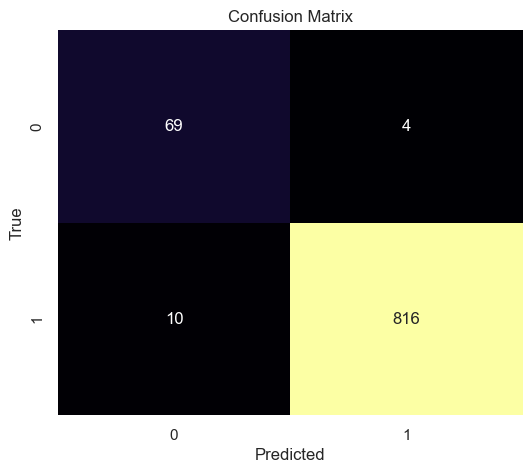

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        73
           1       1.00      0.99      0.99       826

    accuracy                           0.98       899
   macro avg       0.93      0.97      0.95       899
weighted avg       0.99      0.98      0.98       899



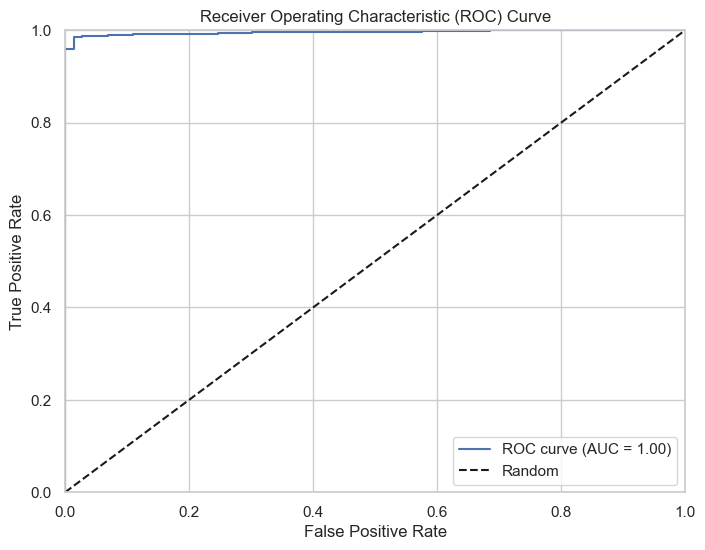

In [253]:


y_pred = voting_soft.predict(X_test)

# Get the confusion matrix

confusion = confusion_matrix(y_test, y_pred)

# Plot confusion matrix

plt.figure(figsize=(6, 5))

sns.heatmap(confusion, annot=True, cmap='inferno', fmt='d', cbar=False)

plt.title('Confusion Matrix')

plt.xlabel('Predicted')

plt.ylabel('True')

plt.show()


# Print classification report

report = classification_report(y_test, y_pred)

print("Classification Report:")

print(report)

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for positive class

y_pred_proba = voting_soft.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score

auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve

plt.figure(figsize=(8, 6))

plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_score))

plt.plot([0, 1], [0, 1], 'k--', label='Random')

plt.xlim([0.0, 1.0])

plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()